[[ 59.96348464 -10.58075408]
 [-10.58075408   2.35715688]] [ 4.51657710e+03 -3.41523229e+00]


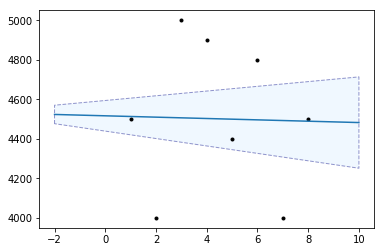

In [7]:
import pylab as pb
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
%matplotlib inline

#creating linspace values for plotting
x = np.linspace(-2,10,100)

w = np.zeros(2)
xdata = np.array([1,2,3,4,5,6,7,8])
ydata = np.array([4500, 4000, 5000,4900,4400,4800,4000,4500])

#Prior belief p(w) = N(0,1000)
priorvar = np.array([[5000, 0],[0, 5000]])
invprior = np.linalg.inv(priorvar)
priormean = np.zeros(2)
w = np.random.multivariate_normal(priormean,priorvar)

#Creating X matrix
phiX = np.vstack((np.ones_like(xdata), xdata)).transpose()

#Creating 
#plt.plot(x, w[0]*x + w[1])

plt.plot(xdata,ydata,'k.')
def PostVariance(s0Inv, beta, phiX):
    return np.linalg.inv(s0Inv + (beta * np.matmul(phiX.transpose(), phiX)))

def PostMean(PostVariance, s0Inv, m0, beta, t, phiX):
    return np.matmul(PostVariance, (np.matmul(s0Inv, m0) + (beta * np.matmul(phiX.transpose(),t))))

#Noise on data N(0,100)

invbeta = 100
beta = 1/invbeta

PostV = PostVariance(invprior, beta, phiX)
PostM = PostMean(PostV, invprior, priormean, beta, ydata, phiX)
print(PostV, PostM)
y = PostM[1]*x + PostM[0]
plt.plot(x,y)
Upperbound = (PostM[1]+10*np.sqrt(PostV[1,1]))*x + (PostM[0] + 10*np.sqrt(PostV[0,0]))
Lowerbound = (PostM[1]-10*np.sqrt(PostV[1,1]))*x + (PostM[0] - 10*np.sqrt(PostV[0,0]))
plt.fill_between(x.flatten(), (Upperbound).flatten(), (Lowerbound).flatten(), facecolor='#F0F8FF', alpha=1.0, edgecolor='#8F94CC', linewidth=1, linestyle='dashed')

